# Linear Regression

<span>Below is an example of a regression problem using linear regression to predict house prices from a dataset provided on Kaggle. The dataset can be found at the link below. Note that I have tried to reduce the amount of regularization found in sklearn's implementation of the model. As well as attempting to compare and contrast the performance of both statsmodel's linear regression model and sklearn's linear regression model. I try to avoid a lot of feature engineering here, as this notebook is just an example of the models.</span>

### Import Preliminaries

In [138]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import modules
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
import warnings

from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from statsmodels.regression import linear_model


# Import models
from sklearn.linear_model import LinearRegression


# Set pandas options
pd.set_option('max_columns',1000)
pd.set_option('max_rows',100)

# Set plotting options
mpl.rcParams['figure.figsize'] = (8.0, 7.0)

# Set warning options
warnings.filterwarnings('ignore');

### Import Data

In [139]:
# Change dataframe to numpy array 
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Conduct a train-test-split on the data
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.25)

In [140]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((331, 10), (111, 10), (331,), (111,))

### Target Outcomes

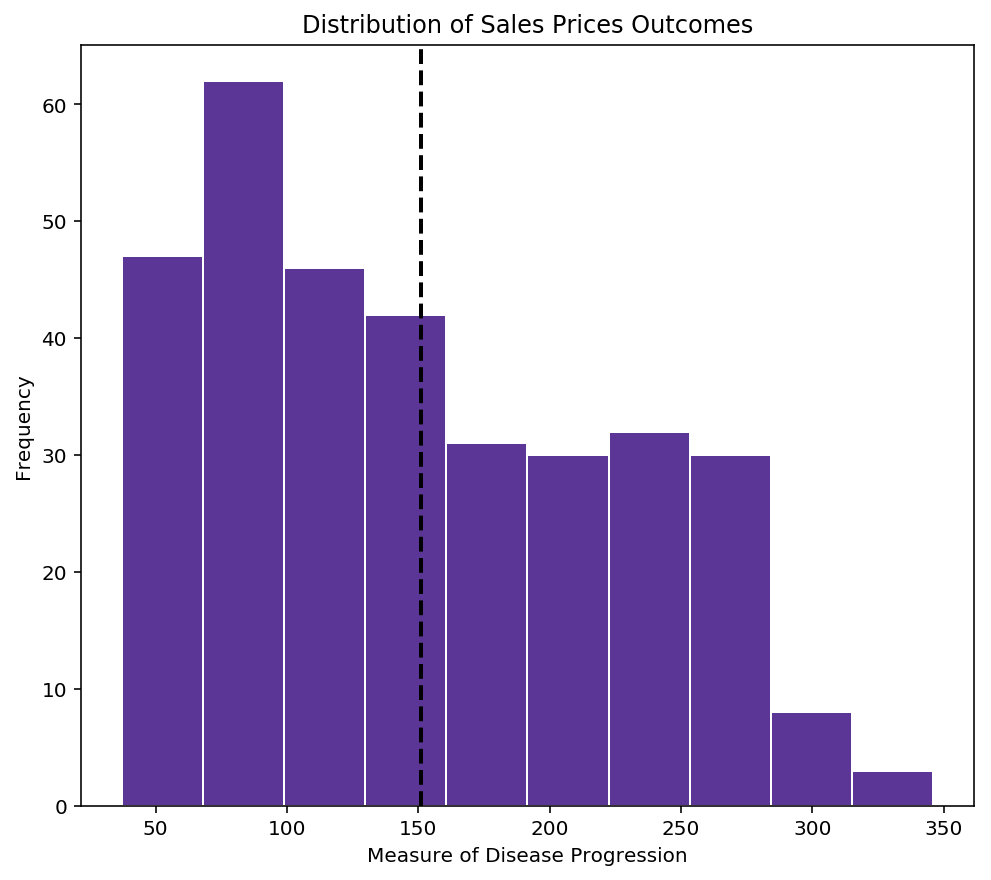

In [141]:
# Plot a histogram of all the home price valuse
pd.Series(train_y).plot.hist(grid=False, color='#5C3697', edgecolor='w',)
plt.title('Distribution of Sales Prices Outcomes')
plt.ylabel('Frequency')
plt.xlabel('Measure of Disease Progression')
plt.axvline(pd.Series(train_y).mean(), color='black', linestyle='dashed', linewidth=2);

### Decomposition

In [142]:
decomposition = PCA(n_components=10)
train_x = decomposition.fit_transform(train_x)
test_x = decomposition.transform(test_x)

### Linear Regression

In [143]:
# Fit a linear model
lr_model = LinearRegression()
lr_model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [144]:
# Calculate our cross validation score
cross_val_score(lr_model, train_x, train_y, cv=10, 
                scoring='r2').mean()

0.44490145732938824

Our cross validation score on our training set was pretty good, considering the best scores from Kaggle Competition competitors hovers around 80.

### Viewing Residuals

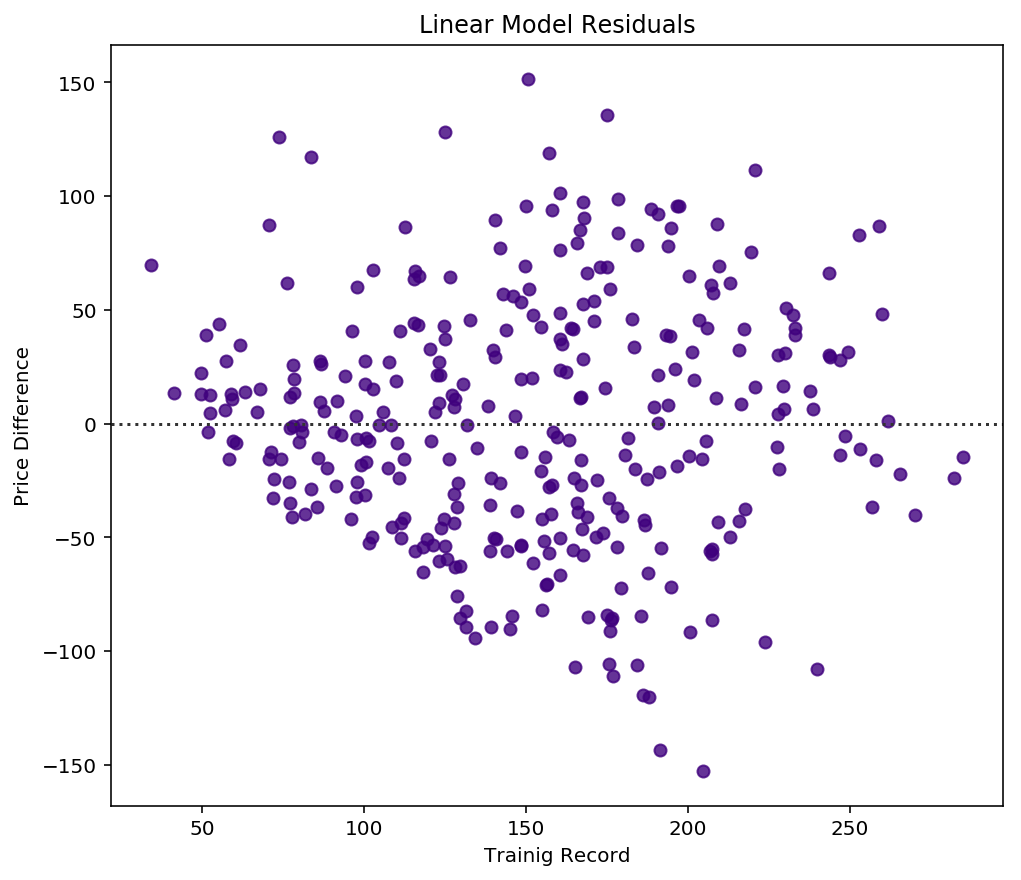

In [145]:
# Plotting residuals from our model
pred_y = lr_model.predict(train_x)
sns.residplot(pred_y, train_y, color='#3F007D');
plt.title('Linear Model Residuals')
plt.ylabel('Price Difference')
plt.xlabel('Trainig Record');

### Using Stat Models

Using thest stats models can give us a bit more information about the linear regression then sklearn. So lets give it a try.

In [146]:
# Conduct linear regression via stats model's API
train_x = sm.add_constant(train_x)
myregression = linear_model.OLS(train_y, train_x).fit()
myregression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     31.33
Date:                Tue, 11 Sep 2018   Prob (F-statistic):           6.63e-42
Time:                        02:43:26   Log-Likelihood:                -1788.7
No. Observations:                 331   AIC:                             3599.
Df Residuals:                     320   BIC:                             3641.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.7946      3.007     50.153      0.000     144.879     156.710
x1           439.5430     32.097     13.694      0.000     376.395     502.691
x2          -246.6867     49.835     -4.950      0.000    -344.732    -148.641
x3           232.6813     56.071      4.150      0.000     122.366     342.997
x4           525.9802     64.310      8.179      0.000     399.457     652.504
x5          -128.9443     78.713     -1.638      0.102    -283.804      25.916
x6          -182.4248     82.499     -2.211      0.028    -344.733     -20.117
x7           174.2188     87.453      1.992      0.047       2.163     346.274
x8            62.1425     95.825      0.649      0.517    -126.384     250.669
x9          -241.4028    230.810     -1.046      0.296    -695.499     212.694
x10        -1346.8189    668.018     -2.016      0.045   -2661.080     -32.557
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                1.003
Skew:                           0.061   Prob(JB):                        0.606
Kurtosis:                       2.760   Cond. No.                         222.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Author: Kavi Sekhon